In [1]:
# install python open-cv 
!pip install opencv-python

# importing nesc. libraries
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt

# for jupyter-notebook plotting purpose
%matplotlib inline


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# everything avaiable in cv2
dir(cv2)

['ACCESS_FAST',
 'ACCESS_MASK',
 'ACCESS_READ',
 'ACCESS_RW',
 'ACCESS_WRITE',
 'ADAPTIVE_THRESH_GAUSSIAN_C',
 'ADAPTIVE_THRESH_MEAN_C',
 'AGAST_FEATURE_DETECTOR_AGAST_5_8',
 'AGAST_FEATURE_DETECTOR_AGAST_7_12D',
 'AGAST_FEATURE_DETECTOR_AGAST_7_12S',
 'AGAST_FEATURE_DETECTOR_NONMAX_SUPPRESSION',
 'AGAST_FEATURE_DETECTOR_OAST_9_16',
 'AGAST_FEATURE_DETECTOR_THRESHOLD',
 'AKAZE',
 'AKAZE_DESCRIPTOR_KAZE',
 'AKAZE_DESCRIPTOR_KAZE_UPRIGHT',
 'AKAZE_DESCRIPTOR_MLDB',
 'AKAZE_DESCRIPTOR_MLDB_UPRIGHT',
 'AKAZE_create',
 'AffineFeature',
 'AffineFeature_create',
 'AgastFeatureDetector',
 'AgastFeatureDetector_AGAST_5_8',
 'AgastFeatureDetector_AGAST_7_12d',
 'AgastFeatureDetector_AGAST_7_12s',
 'AgastFeatureDetector_NONMAX_SUPPRESSION',
 'AgastFeatureDetector_OAST_9_16',
 'AgastFeatureDetector_THRESHOLD',
 'AgastFeatureDetector_create',
 'Algorithm',
 'AlignExposures',
 'AlignMTB',
 'AsyncArray',
 'BFMatcher',
 'BFMatcher_create',
 'BORDER_CONSTANT',
 'BORDER_DEFAULT',
 'BORDER_ISOLATED',
 'B

In [3]:
# reading a image
img = cv2.imread('.\\test_images\\sakib al hasan_1.jpg')

# shape of the image
img.shape

(500, 700, 3)

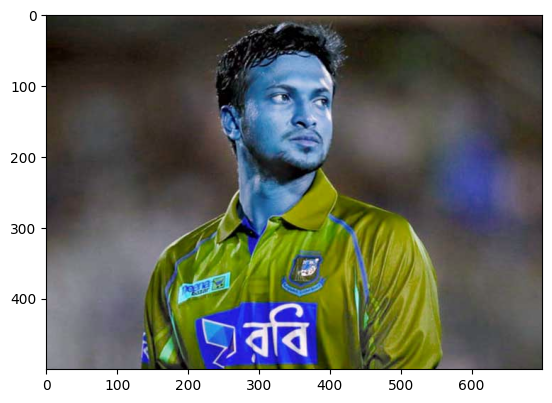

In [4]:
# plot that image
plt.imshow(img)

In [5]:
# convert that image to gray color
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# gray shape
gray.shape

(500, 700)

In [6]:
gray

array([[ 40,  40,  40, ...,  60,  60,  60],
       [ 39,  39,  39, ...,  59,  59,  59],
       [ 38,  38,  38, ...,  57,  57,  57],
       ...,
       [140, 140, 140, ...,  71,  71,  71],
       [140, 140, 140, ...,  69,  69,  69],
       [140, 140, 140, ...,  68,  68,  68]], dtype=uint8)

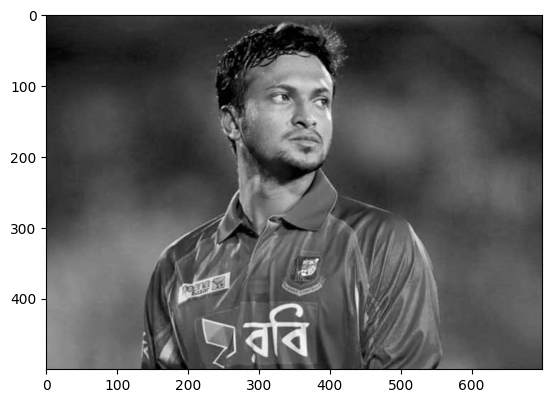

In [7]:
# plotting gray scale image
plt.imshow(gray,cmap='gray')

In [8]:
# haarcascade built in cv2 files for frontalface and eye detection
face_cascade = cv2.CascadeClassifier('.\\opencv\\haarcascades\\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('.\\opencv\\haarcascades\\haarcascade_eye.xml')

# face co-ordinates
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

# array([x,y,w,h])

array([[289,  61, 148, 148]])

In [9]:
# array([[352,  38, 233, 233]])
# one face, x,y,w,h
(x,y,w,h) = faces[0]

x,y,w,h

(289, 61, 148, 148)

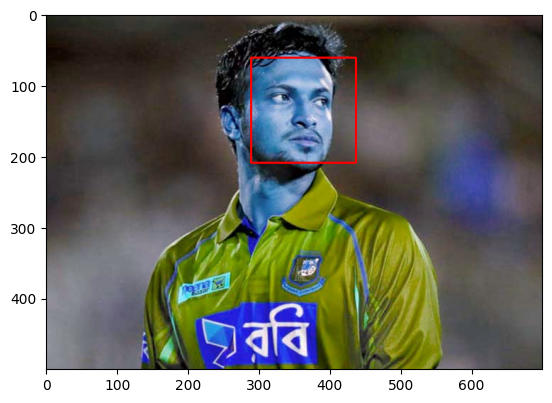

In [10]:
# draw a rectangle around the face
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
# show that rectangle in plot
plt.imshow(face_img)

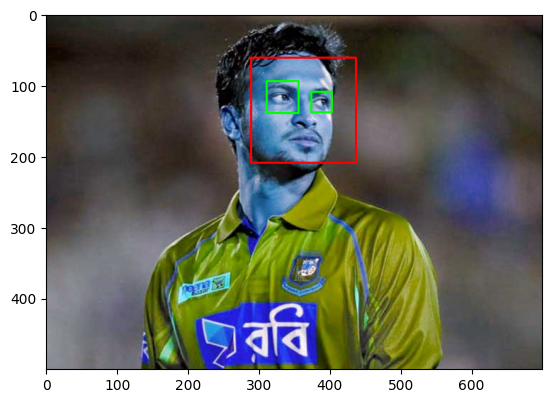

In [11]:
# detect eye function for detecting two eyes and detecting roi (region of interest)

cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

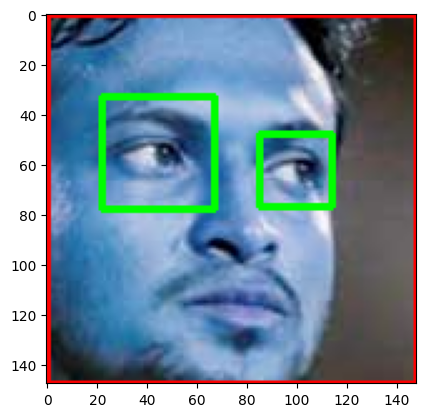

In [12]:
# just plotting the roi
plt.imshow(roi_color, cmap='gray')

In [13]:
# a function from the previous code to return roi

def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
#     most time consuming bug
    if img is not None:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2:
                return roi_color

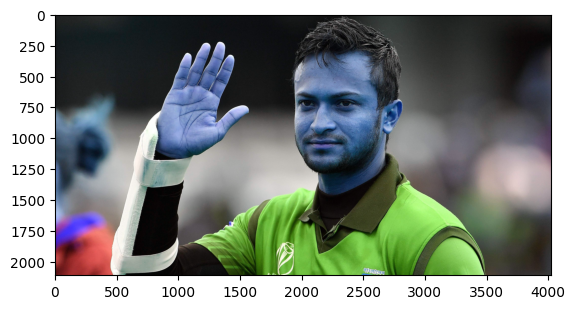

In [14]:
# another image
original_image = cv2.imread('.\\test_images\\sakib al hasan_2.jpg')
plt.imshow(original_image)

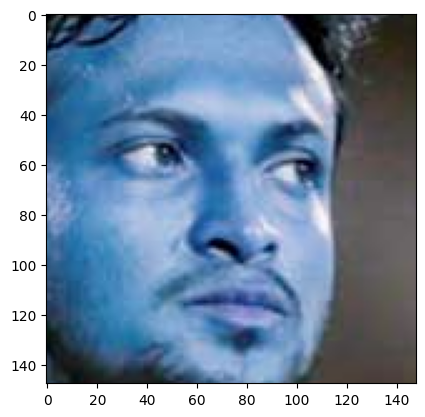

In [15]:
# used cropped function for getting roi
cropped_image = get_cropped_image_if_2_eyes('.\\test_images\\sakib al hasan_1.jpg')
plt.imshow(cropped_image)

In [16]:
# just two path variables
path_to_data = ".\\dataset"
path_to_cr_data = ".\\dataset\\cropped\\"

In [17]:
# dataset directories
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [18]:
# printing 
img_dirs

['.\\dataset\\Ayman Sadiq',
 '.\\dataset\\Bangabandhu Sheikh Mujibur Rahman',
 '.\\dataset\\Humayun Ahmed',
 '.\\dataset\\Jamilur Reza Chowdhury',
 '.\\dataset\\Muhammad Zafar Iqbal',
 '.\\dataset\\Runa Laila',
 '.\\dataset\\Shahidul Alam',
 '.\\dataset\\Shakib Al Hasan',
 '.\\dataset\\Sheikh Hasina',
 '.\\dataset\\Wasfia Nazreen']

In [19]:
# if not exict cropped path the create and if exist remove
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [20]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

# all the directories
for img_dir in img_dirs:
    count = 1
#     splitting name
    celebrity_name = img_dir.split('\\')[-1]
    print(celebrity_name)
    
#     initialize the map
    celebrity_file_names_dict[celebrity_name] = []
#         cropped image for all the image in a directory
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
#                 mkdir in python
                os.makedirs(cropped_folder)
#                 list adding
                cropped_image_dirs.append(cropped_folder)
                print('Generating cropped image in folder:',cropped_folder)
#                 shakib al hasan1.png
            cropped_file_name = celebrity_name + str(count) + ".png"
#             path
            cropped_file_path = cropped_folder + '\\' + cropped_file_name
#             save the cropped image
            cv2.imwrite(cropped_file_path,roi_color)
            
#             map of celebrity name : [list_of_cropped files path]
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            
            count += 1

Ayman Sadiq
Generating cropped image in folder: .\dataset\cropped\Ayman Sadiq
Bangabandhu Sheikh Mujibur Rahman
Generating cropped image in folder: .\dataset\cropped\Bangabandhu Sheikh Mujibur Rahman
Humayun Ahmed
Generating cropped image in folder: .\dataset\cropped\Humayun Ahmed
Jamilur Reza Chowdhury
Generating cropped image in folder: .\dataset\cropped\Jamilur Reza Chowdhury
Muhammad Zafar Iqbal
Generating cropped image in folder: .\dataset\cropped\Muhammad Zafar Iqbal
Runa Laila
Generating cropped image in folder: .\dataset\cropped\Runa Laila
Shahidul Alam
Generating cropped image in folder: .\dataset\cropped\Shahidul Alam
Shakib Al Hasan
Generating cropped image in folder: .\dataset\cropped\Shakib Al Hasan
Sheikh Hasina
Generating cropped image in folder: .\dataset\cropped\Sheikh Hasina
Wasfia Nazreen
Generating cropped image in folder: .\dataset\cropped\Wasfia Nazreen


In [21]:
# delete the cropped file from the dictonary
if celebrity_file_names_dict.get('cropped'):
    del celebrity_file_names_dict['cropped']

In [22]:
# for wavelet transformation for getting bw image

import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

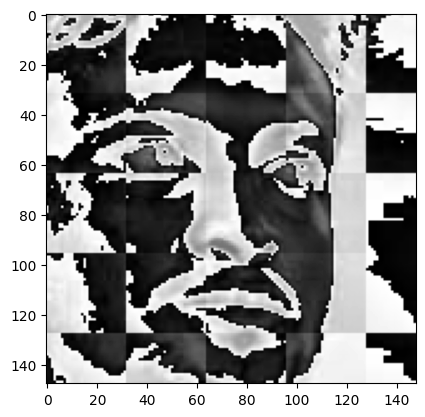

In [23]:
# plot that bw image

im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [24]:
# build the dictonary twice in case of delteing something manually after cropping

celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('\\')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list

In [25]:
celebrity_file_names_dict

{'Ayman Sadiq': ['.\\dataset\\cropped\\Ayman Sadiq\\Ayman Sadiq1.png',
  '.\\dataset\\cropped\\Ayman Sadiq\\Ayman Sadiq10.png',
  '.\\dataset\\cropped\\Ayman Sadiq\\Ayman Sadiq100.png',
  '.\\dataset\\cropped\\Ayman Sadiq\\Ayman Sadiq101.png',
  '.\\dataset\\cropped\\Ayman Sadiq\\Ayman Sadiq102.png',
  '.\\dataset\\cropped\\Ayman Sadiq\\Ayman Sadiq103.png',
  '.\\dataset\\cropped\\Ayman Sadiq\\Ayman Sadiq104.png',
  '.\\dataset\\cropped\\Ayman Sadiq\\Ayman Sadiq105.png',
  '.\\dataset\\cropped\\Ayman Sadiq\\Ayman Sadiq106.png',
  '.\\dataset\\cropped\\Ayman Sadiq\\Ayman Sadiq107.png',
  '.\\dataset\\cropped\\Ayman Sadiq\\Ayman Sadiq108.png',
  '.\\dataset\\cropped\\Ayman Sadiq\\Ayman Sadiq109.png',
  '.\\dataset\\cropped\\Ayman Sadiq\\Ayman Sadiq11.png',
  '.\\dataset\\cropped\\Ayman Sadiq\\Ayman Sadiq110.png',
  '.\\dataset\\cropped\\Ayman Sadiq\\Ayman Sadiq111.png',
  '.\\dataset\\cropped\\Ayman Sadiq\\Ayman Sadiq112.png',
  '.\\dataset\\cropped\\Ayman Sadiq\\Ayman Sadiq113.png',
  '

In [26]:
# class dict as y have to be number

class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count +=1
class_dict

{'Ayman Sadiq': 0,
 'Bangabandhu Sheikh Mujibur Rahman': 1,
 'Humayun Ahmed': 2,
 'Jamilur Reza Chowdhury': 3,
 'Muhammad Zafar Iqbal': 4,
 'Runa Laila': 5,
 'Shahidul Alam': 6,
 'Shakib Al Hasan': 7,
 'Sheikh Hasina': 8,
 'Wasfia Nazreen': 9}

In [27]:
# features and targets

X = []
y = []

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
#         if img is not None:
        scalled_raw_img = cv2.resize(img,(32,32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har,(32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [28]:
len(X)

1431

In [29]:
len(y)

1431

In [30]:
len(X[0])

4096

In [31]:
# h*w*rgb+h*w*bw
32*32*3 + 32*32*1

4096

In [32]:
X[0]

array([[146],
       [ 94],
       [ 81],
       ...,
       [255],
       [  0],
       [  0]], dtype=uint8)

In [33]:
# reshape that matrix as image size and 4096

X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(1431, 4096)

In [34]:
X[0]

array([146.,  94.,  81., ..., 255.,   0.,   0.])

In [35]:
!pip install scikit-learn


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_val, y_train, y_val = train_test_split(X,y,random_state=0)

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [39]:
# pipline is a technique to use multiplue things in one go, like scaling and model declaration
pipe = Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])

In [40]:
pipe.fit(X_train,y_train)
pipe.score(X_val,y_val)

0.9692737430167597

In [41]:
from sklearn.metrics import classification_report

In [42]:
len(y_val)

358

In [43]:
# classification repport
print(classification_report(y_val, pipe.predict(X_val)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        59
           1       1.00      1.00      1.00        17
           2       1.00      0.83      0.91        12
           3       0.79      0.96      0.87        28
           4       1.00      0.44      0.62         9
           5       1.00      1.00      1.00        58
           6       0.95      0.95      0.95        21
           7       0.97      1.00      0.99        38
           8       0.98      0.96      0.97        56
           9       1.00      1.00      1.00        60

    accuracy                           0.97       358
   macro avg       0.97      0.92      0.93       358
weighted avg       0.97      0.97      0.97       358



In [44]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model

In [45]:
# just a disctionary for hyper prarm tunning

model_params = {
    'svm': {
        'model':svm.SVC(gamma='auto',probability=True),
        'params':{
            'svc__C': [1,5,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model':RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators':[1,5,10]
        }
    },
    'logistic_regression': {
        'model':linear_model.LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C':[1,5,10]
        }
    }
}

In [46]:
# use gridseachcv for hyperparam tuning and best classifier finding

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

scores = []
best_estimators = {}

# key,value pair

for model_name, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(),mp['model'])
    clf = GridSearchCV(pipe,mp['params'],cv=5,return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append(
        {
            'model' : model_name,
            'best_score' : clf.best_score_,
            'best_params' : clf.best_params_
        }
    )
    best_estimators[model_name] = clf.best_estimator_

In [47]:
import pandas as pd
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [48]:
# dataframe of the gridsearchcv
df

,model,best_score,best_params
0,svm,0.938448,"{'svc__C': 5, 'svc__kernel': 'rbf'}"
1,random_forest,0.774432,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.875101,{'logisticregression__C': 1}


In [49]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=5, gamma='auto', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [50]:
best_estimators['svm'].score(X_val,y_val)

0.9692737430167597

In [51]:
best_estimators['random_forest'].score(X_val,y_val)

0.8324022346368715

In [52]:
best_estimators['logistic_regression'].score(X_val,y_val)

0.9441340782122905

In [53]:
# best classifer model
best_clf = best_estimators['svm']

In [54]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, best_clf.predict(X_val))
cm

array([[59,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 17,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 10,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 27,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  4,  4,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 58,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0, 20,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 38,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0,  0, 54,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 60]], dtype=int64)

Text(50.722222222222214, 0.5, 'truth')

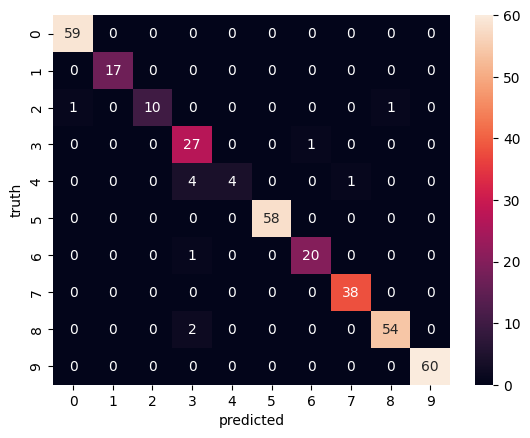

In [55]:
# plot confusion matrix in heatmap
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

In [56]:
# class dict
class_dict

{'Ayman Sadiq': 0,
 'Bangabandhu Sheikh Mujibur Rahman': 1,
 'Humayun Ahmed': 2,
 'Jamilur Reza Chowdhury': 3,
 'Muhammad Zafar Iqbal': 4,
 'Runa Laila': 5,
 'Shahidul Alam': 6,
 'Shakib Al Hasan': 7,
 'Sheikh Hasina': 8,
 'Wasfia Nazreen': 9}

In [57]:
# import the model in joblib
!pip install joblib
import joblib
joblib.dump(best_clf,'saved_model.pkl')


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


['saved_model.pkl']

In [58]:
# import the class dictonray as json file
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))